In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import dataset
td = pd.read_csv('sales.csv')

In [3]:
td.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
td.describe()

,Unnamed: 0,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


## DATA VISUALIZATION

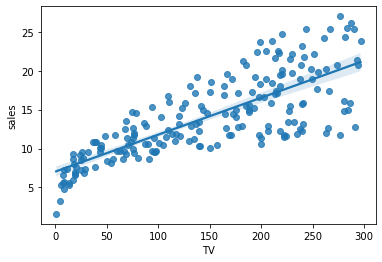

In [5]:
sns.regplot(x = "TV", y = "sales", data=td)

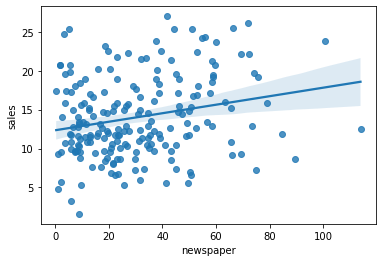

In [6]:
sns.regplot(x = "newspaper", y = "sales", data=td)

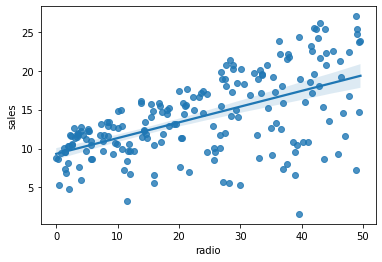

In [7]:
sns.regplot(x = "radio", y = "sales", data=td)

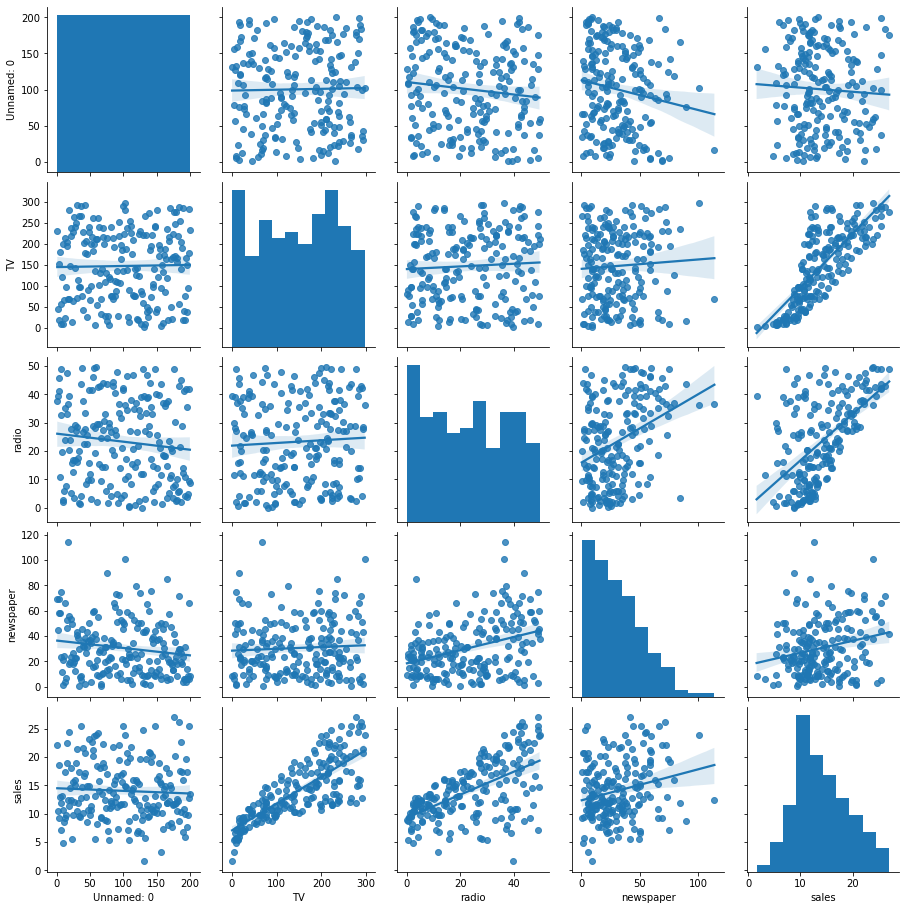

In [8]:
# Fit linear regression models to the scatter plots:
sns.pairplot(td, kind = 'reg') 

## DATA CLEANING

In [9]:
td.head(10)

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9
5,6,8.7,48.9,75.0,7.2
6,7,57.5,32.8,23.5,11.8
7,8,120.2,19.6,11.6,13.2
8,9,8.6,2.1,1.0,4.8
9,10,199.8,2.6,21.2,10.6


In [10]:
# removing unwanted column Unnamed
td.drop('Unnamed: 0', inplace = True, axis = 1)

In [11]:
td.head(10)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,10.6


In [12]:
# check for null values
td.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [13]:
td.dropna(inplace = True)

## Training Data

In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [15]:
X = td.iloc[:, [0 , 1, 2]]
y = td.iloc[:, [3]]

In [16]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

In [17]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [18]:
# Create Model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [19]:
print("The linear model is: Y = {:.5} + {:.5}*TV + {:.5}*radio + {:.5}*newspaper".format(model.intercept_[0], model.coef_[0][0], model.coef_[0][1], model.coef_[0][2]))

The linear model is: Y = 14.218 + 3.7759*TV + 2.8866*radio + -0.059461*newspaper


In [20]:
y_pred = model.predict(X_test)

In [21]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.361781350209028
Mean Squared Error: 4.402118291449684
Root Mean Squared Error: 2.09812256349568


### You can see that the value of root mean squared error is 2.098. This means that our algorithm was not very accurate but can still make reasonably good predictions.

In [22]:
model.score(X_test, y_test)

0.8601145185017869

In [23]:
import statsmodels.api as sm
X = np.column_stack((td['TV'], td['radio'], td['newspaper']))
y = td['sales']

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.897
Model:                            OLS   Adj. R-squared:                  0.896
Method:                 Least Squares   F-statistic:                     570.3
Date:                Mon, 17 Aug 2020   Prob (F-statistic):           1.58e-96
Time:                        01:08:02   Log-Likelihood:                -386.18
No. Observations:                 200   AIC:                             780.4
Df Residuals:                     196   BIC:                             793.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9389      0.312      9.422      0.0

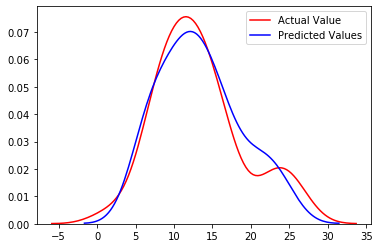

In [24]:
ax1 = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values" , ax=ax1)